# Titanic Data Analysis - by Alex Dance

Analysis using an interesting data set

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
titanic = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Titanic/titanic.csv')

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#!pip install pandas_profiling

In [6]:
#import pandas_profiling

In [7]:
# Temporarily stopped below

In [8]:
#pandas_profiling.ProfileReport(titanic)

In [9]:
titanic.shape

(891, 12)

In [10]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# select all female passengers
female_pass = titanic[(titanic['Sex'] == 'female')]
female_pass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
#  multiple conditions (AND)
dummy1 = titanic[(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1)]
dummy1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [14]:
#  multiple conditions (OR)
dummy2 = titanic[(titanic['Sex'] == 'female') | (titanic['Pclass'] == 1)]
dummy2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [15]:
# Mean fare for all titanic passengers

round(titanic['Fare'].mean(), 2)

32.2

In [16]:
# classes are there in Pclass?

classes = titanic['Pclass'].sort_values().unique()
print(classes)

[1 2 3]


In [17]:
# Using for loop

## Find unique values in Pclass 
classes = titanic['Pclass'].sort_values().unique()

## Save empty list to store mean fare of each class
mean_list = []
count_list = []

## loop: for each Pclass, find the mean fare and store in list
for p_class in classes:
    mean = titanic[titanic['Pclass'] == p_class]['Fare'].mean()
    mean_list.append(mean)
    
    count = len(titanic[titanic['Pclass'] == p_class]['Fare'])
    count_list.append(count)
    #print("Loop {}".format(p_class))
    #print(mean_list)
    #print(count_list)
    
print(mean_list, count_list)

[84.1546875, 20.662183152173913, 13.675550101832993] [216, 184, 491]


In [18]:
fare_stats_df = pd.DataFrame({'Pclass': classes, 'Count': count_list, 'Mean Fare': mean_list})
fare_stats_df

,Pclass,Count,Mean Fare
0,1,216,84.154687
1,2,184,20.662183
2,3,491,13.675550


In [19]:
# Find mean fare grouped by Pclass

fare_mean_count = titanic.groupby(['Pclass'])['Fare'].agg(['count', 'mean'])
fare_mean_count

,count,mean
Pclass,,
1,216,84.154687
2,184,20.662183
3,491,13.675550


In [20]:
print(fare_mean_count.columns)

Index(['count', 'mean'], dtype='object')


In [21]:
# Rename columns
fare_mean_count.columns = ['No. Passengers', 'Mean Fare']
fare_mean_count

,No. Passengers,Mean Fare
Pclass,,
1,216,84.154687
2,184,20.662183
3,491,13.675550


In [22]:
# Using .rename()
fare_mean_count2 =  fare_mean_count.rename(index={1: 'First',
                                                  2: 'Second',
                                                  3: 'Third'},
                                           columns={'No. Passengers': 'Count',
                                                    'Fare': 'Mean'})
fare_mean_count2

,Count,Mean Fare
Pclass,,
First,216,84.154687
Second,184,20.662183
Third,491,13.675550


In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
print(titanic.columns[titanic.isnull().any()])

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [25]:
#titanic.loc[titanic.Age.isnull()]

In [26]:
#titanic.loc[titanic.Age.isnull()]

In [27]:
titanic.loc[titanic.Age.isnull()].sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_6812\226163316.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.loc[titanic.Age.isnull()].sum()


PassengerId                                                77098
Survived                                                      52
Pclass                                                       460
Name           Moran, Mr. JamesWilliams, Mr. Charles EugeneMa...
Sex            malemalefemalemalefemalemalefemalefemalemalema...
Age                                                          0.0
SibSp                                                        100
Parch                                                         32
Ticket         33087724437326492631330959349216PC 17569335677...
Fare                                                   3922.0663
Embarked       QSCCQSCQCCSQQCSCCSSQSSSSQSQCCSSSSSSSCSQQQSQSSS...
dtype: object

In [28]:
#titanic.loc[titanic.Age.isnull()].groupby('Sex')'.mean'

In [29]:
titanic.loc[titanic.Age.isnull()].sum()

C:\Users\sasha\AppData\Local\Temp\ipykernel_6812\226163316.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.loc[titanic.Age.isnull()].sum()


PassengerId                                                77098
Survived                                                      52
Pclass                                                       460
Name           Moran, Mr. JamesWilliams, Mr. Charles EugeneMa...
Sex            malemalefemalemalefemalemalefemalefemalemalema...
Age                                                          0.0
SibSp                                                        100
Parch                                                         32
Ticket         33087724437326492631330959349216PC 17569335677...
Fare                                                   3922.0663
Embarked       QSCCQSCQCCSQQCSCCSSQSSSSQSQCCSSSSSSSCSQQQSQSSS...
dtype: object

In [30]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
titanic.loc[titanic.Age.isnull()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [32]:
titanic.loc[titanic.Age.isnull()]['SibSp'].value_counts()

0    137
1     26
8      7
3      4
2      3
Name: SibSp, dtype: int64

In [33]:
display(titanic.Age.value_counts().count())

88

In [34]:
display(titanic.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64

<Axes: ylabel='Frequency'>

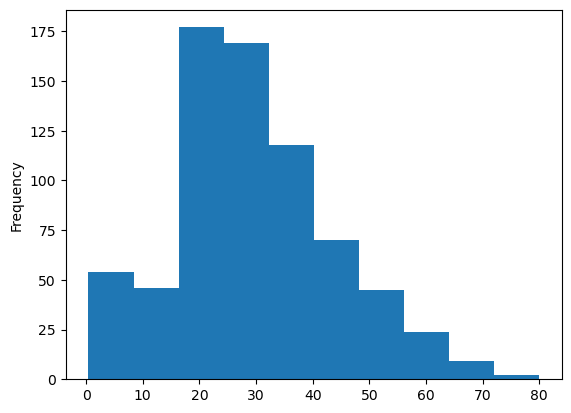

In [35]:
titanic.loc[-titanic.Age.isnull()]['Age'].plot.hist()

<Axes: ylabel='Frequency'>

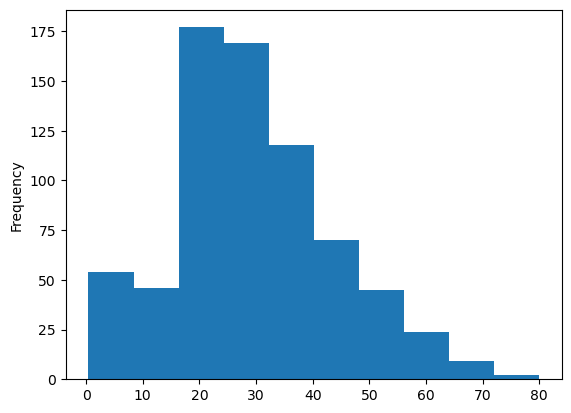

In [36]:
titanic['Age'].plot.hist()


In [37]:
df = titanic.copy()

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
#titanic['Age'] = titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('mean')) 
titanic['Age'] = titanic['Age'].fillna(titanic.groupby('SibSp')['Age'].transform('mean'))

In [41]:
# titanic['Age'] = pd.DataFrame(my_imputer.fit_transform(alexmelbexclude))

In [42]:
#titanic['Age'].hist()  
#titanic.groupby(['Sex','Age']  #.agg(mean)

In [43]:
titanic.loc[titanic.Age.isnull()]['Sex'].value_counts()

male      4
female    3
Name: Sex, dtype: int64

In [44]:
titanic[titanic.Age.isnull()]['Sex'].value_counts()

male      4
female    3
Name: Sex, dtype: int64

In [45]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              7
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
titanic['Age'] = titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('mean')) 

In [47]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
print(titanic[1:3])

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [49]:
print(titanic['Sex'][2])

female


In [50]:
dummy4 = titanic.groupby('Ticket').size().sort_values(ascending=False)
dummy4.head()

Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
dtype: int64

In [51]:
dummy5 = titanic.groupby('Age').size().sort_values(ascending=False)
dummy5.head()

Age
31.397558    137
24.000000     30
22.000000     27
18.000000     26
30.089727     26
dtype: int64

### Age

<Axes: >

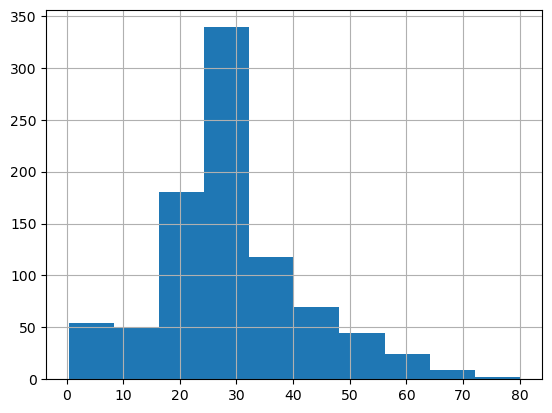

In [52]:
# ANSWER 
#Below works and is replicated above
titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('mean')).hist()  

In [53]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [54]:
titanic.groupby('Cabin')['Sex']

In [55]:
titanic.loc[titanic.Cabin.isnull()]['Age'].value_counts()

31.397558    123
22.000000     24
28.000000     23
18.000000     22
30.000000     21
            ... 
14.500000      1
70.500000      1
32.500000      1
12.000000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [56]:
titanic['Cabin'] = titanic['Cabin'].fillna("Unknown")

### Embarked

In [57]:
titanic.groupby('Embarked').size().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
dtype: int64

In [58]:
tempembarked=titanic.groupby(['Embarked', 'Age'])
#tempembarked.first() 
#tempembarked.head(2)

In [59]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
#titanic['Embarked'] = titanic['Embarked'].fillna(lambda x: titanic.value_counts().index[0]) was previous way

In [60]:
titanic['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [61]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [62]:
#See Pearsons Correlation Report Above 
# Plus sse below

In [63]:
r = np.corrcoef(titanic['Survived'], titanic['Age'])
print(r)

[[ 1.         -0.07115876]
 [-0.07115876  1.        ]]


In [64]:
temp = titanic.corr()
import seaborn as sns

C:\Users\sasha\AppData\Local\Temp\ipykernel_6812\678238647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = titanic.corr()


<Axes: >

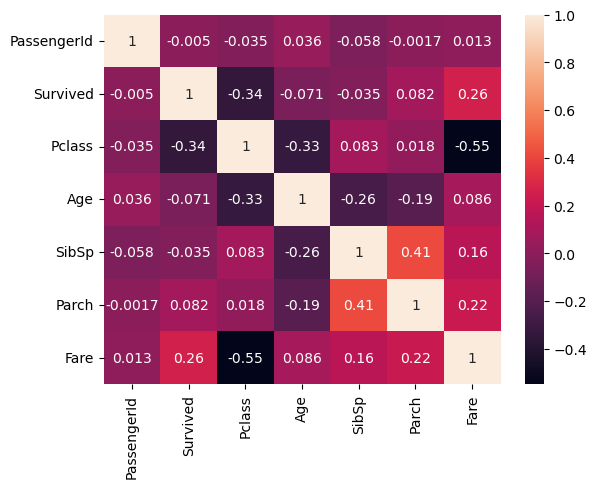

In [65]:
sns.heatmap(temp, annot = True) 

In [66]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

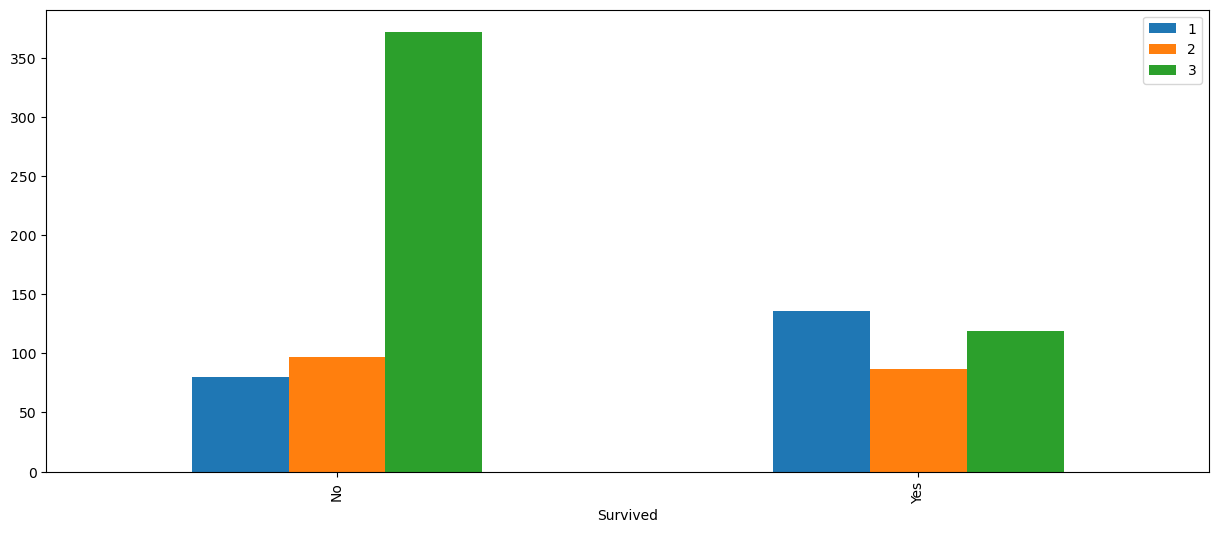

In [67]:

bar_charts(titanic,'Pclass')

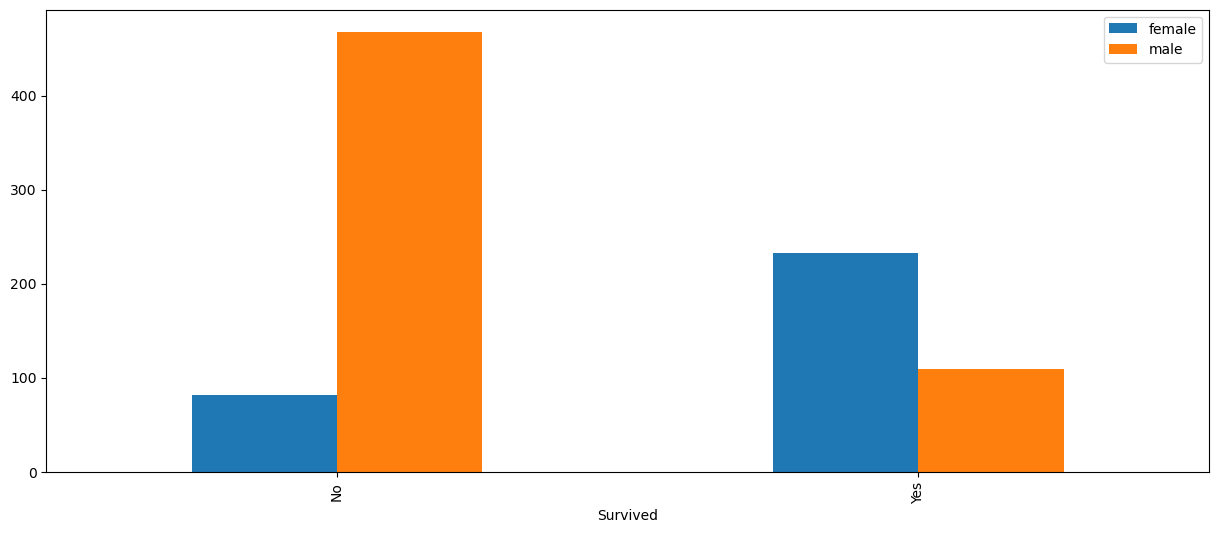

In [68]:

bar_charts(titanic,'Sex')

## Parch

Parch = Number of parents of children travelling with each passenger.

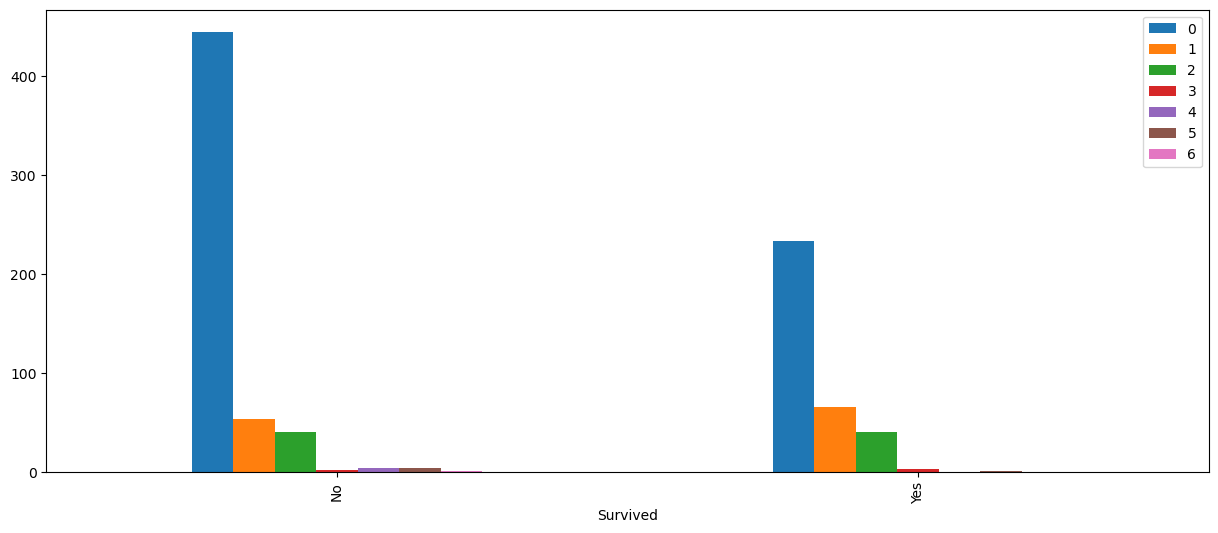

In [69]:
bar_charts(titanic,'Parch')

## SibSp

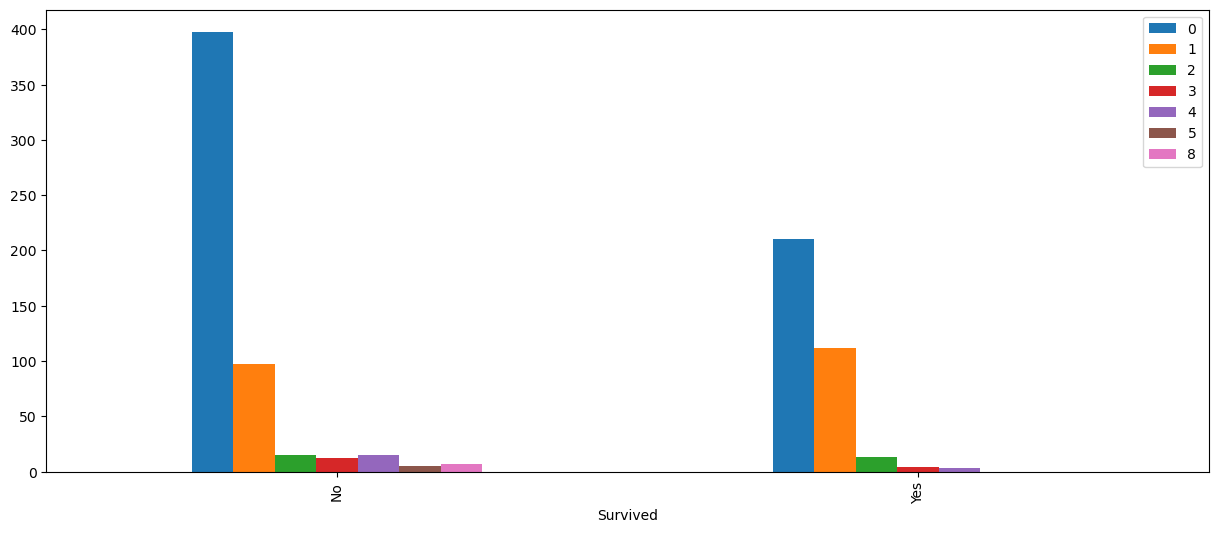

In [70]:
bar_charts(titanic,'SibSp')

## Embarked

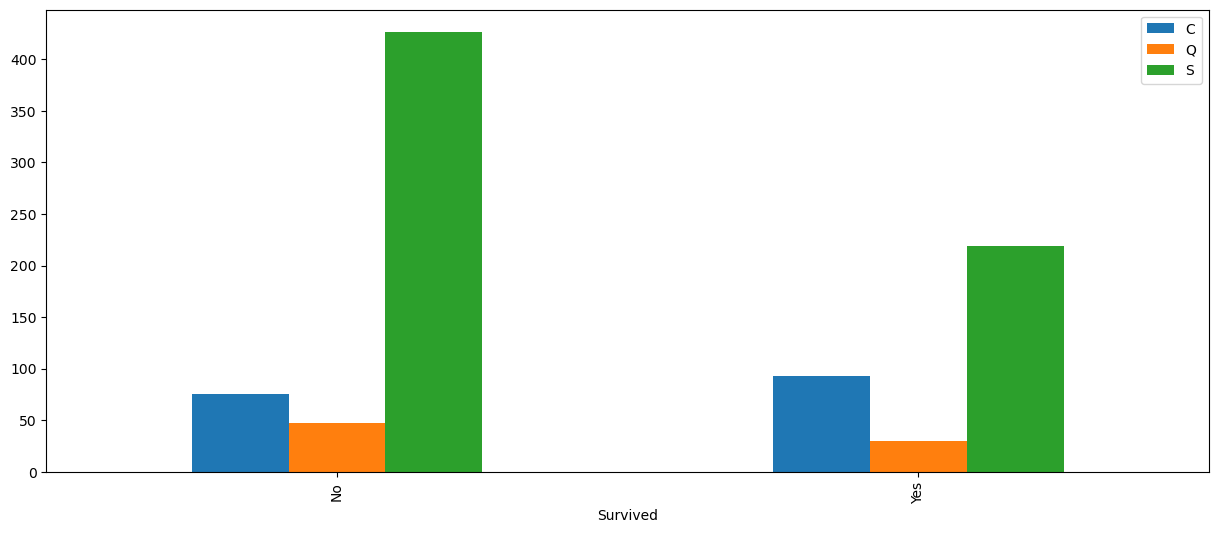

In [71]:
bar_charts(titanic,'Embarked')

# Feature Engineering


In [72]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [73]:
fare_classa =[]
for i in titanic['Fare']:
    result = create_fare_class(i)
    fare_classa.append(result)

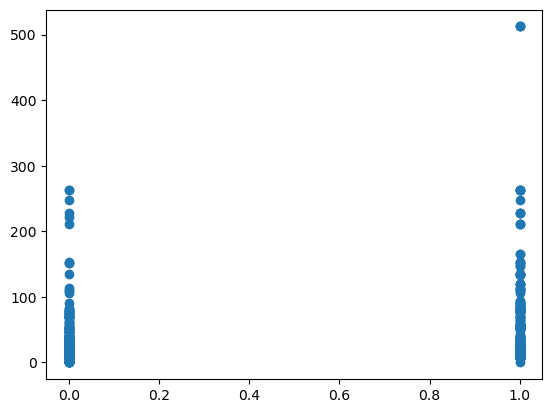

In [74]:
plt.scatter(titanic['Survived'], titanic['Fare'])

In [75]:
r = np.corrcoef(titanic['Survived'], titanic['Fare'])
print(r)

[[1.         0.25730652]
 [0.25730652 1.        ]]


In [76]:
titanic['FareClass'] = fare_classa

In [77]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,4


In [78]:
r = np.corrcoef(titanic['Survived'], titanic['FareClass'])
print(r)

[[ 1.         -0.30759988]
 [-0.30759988  1.        ]]


## Age Class

In [79]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [80]:
age_classa =[]
for i in titanic['Age']:
    result = create_age_class(i)
    age_classa.append(result)

In [81]:
titanic['AgeClass'] = age_classa

In [82]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareClass,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,4,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,4,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,4,3


# Staistical Overview

## Correlation

See correlation between `survived` and other features.

In [83]:
titanic.corr()

C:\Users\sasha\AppData\Local\Temp\ipykernel_6812\2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FareClass,AgeClass
PassengerId,1.000000,-0.005007,-0.035144,0.036492,-0.057527,-0.001652,0.012658,0.003258,0.033572
Survived,-0.005007,1.000000,-0.338481,-0.071159,-0.035322,0.081629,0.257307,-0.307600,-0.062136
Pclass,-0.035144,-0.338481,1.000000,-0.329197,0.083081,0.018443,-0.549500,0.719670,-0.299961
Age,0.036492,-0.071159,-0.329197,1.000000,-0.255275,-0.189934,0.086195,-0.093127,0.936455
SibSp,-0.057527,-0.035322,0.083081,-0.255275,1.000000,0.414838,0.159651,-0.380692,-0.255169
Parch,-0.001652,0.081629,0.018443,-0.189934,0.414838,1.000000,0.216225,-0.387100,-0.172041
Fare,0.012658,0.257307,-0.549500,0.086195,0.159651,0.216225,1.000000,-0.599129,0.076786
FareClass,0.003258,-0.307600,0.719670,-0.093127,-0.380692,-0.387100,-0.599129,1.000000,-0.072730
AgeClass,0.033572,-0.062136,-0.299961,0.936455,-0.255169,-0.172041,0.076786,-0.072730,1.000000


### Collecting Data



In [84]:
titanic_young = titanic[titanic.Age <= 35]
titanic_old = titanic[titanic.Age >35]

In [85]:
titanic_young.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  674 non-null    int64  
 1   Survived     674 non-null    int64  
 2   Pclass       674 non-null    int64  
 3   Name         674 non-null    object 
 4   Sex          674 non-null    object 
 5   Age          674 non-null    float64
 6   SibSp        674 non-null    int64  
 7   Parch        674 non-null    int64  
 8   Ticket       674 non-null    object 
 9   Fare         674 non-null    float64
 10  Cabin        674 non-null    object 
 11  Embarked     674 non-null    object 
 12  FareClass    674 non-null    int64  
 13  AgeClass     674 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 79.0+ KB


# a test statistic that can be used to assess the truth of the null hypothesis.

In [86]:
alpha=0.05

### Calculate point estimate

In [87]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [88]:
a.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [89]:
b.head()

1     1
6     0
11    1
13    0
15    1
Name: Survived, dtype: int64

In [90]:
print(len(a))

674


In [91]:
print(len(b))

217


In [92]:
print(len(titanic_old))

217


In [93]:
a=a.sample(217, random_state = 45) 
b=a.sample(217, random_state = 45) 

In [94]:
#The variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [95]:
import scipy.stats as stats

In [96]:
## t-statistics
N = 217 
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

In [97]:
t  # if t is below P then 

0.0

p-value

> P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [98]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

In [99]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 0.0
p = 1.0


### Interpret results

> Comparing the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [100]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [101]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 0.0
p = 1.0
We fail to reject our null hypothesis.


Extra From Alex

In [102]:
titanic['First'] = titanic['Name'].str.split(".").str.get(0).str.split(",").str.get(-1)

In [103]:
titanic[['First', 'Name']].head()

,First,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
